In [10]:
import cv2

import os
src_dir = "/home/vorkov/Workspace/EDA/learning/data/UTKFace_resized_childfree"
dst_dir = "/home/vorkov/Workspace/EDA/learning/data/UTKFace_resized_childfree_96"

trash_list = []
for filename in os.listdir(src_dir):
    src_file_path = os.path.join(src_dir, filename)
    dst_file_path = os.path.join(dst_dir, filename)
    src = cv2.imread(src_file_path, cv2.IMREAD_UNCHANGED)
    dst = cv2.resize(src, (96, 96))
    cv2.imwrite(dst_file_path,dst)

In [11]:
from ultralytics import YOLO

modelYolo = YOLO('../../models/yolov8n-face.pt')

In [4]:
# results = modelYolo('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = modelYolo.track("/home/vorkov/Documents/x.jpg")
results


image 1/1 /home/vorkov/Documents/x.jpg: 960x704 1 face, 77.9ms
Speed: 9.5ms preprocess, 77.9ms inference, 219.7ms postprocess per image at shape (1, 3, 960, 704)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'face'}
 orig_img: array([[[192, 200, 200],
         [189, 197, 197],
         [189, 197, 197],
         ...,
         [177, 191, 189],
         [176, 190, 188],
         [176, 190, 188]],
 
        [[194, 202, 202],
         [193, 201, 201],
         [192, 200, 200],
         ...,
         [180, 194, 192],
         [179, 193, 191],
         [178, 192, 190]],
 
        [[195, 203, 203],
         [197, 205, 205],
         [195, 203, 203],
         ...,
         [180, 194, 192],
         [179, 193, 191],
         [178, 192, 190]],
 
        ...,
 
        [[ 59,  52,  57],
         [ 36,  29,  34],
         [ 34,  27,  32],
         ...,
         [ 32,  28,  27],
         [ 32,  28,  27],
         [ 32,  28,  27]],
 
        [[ 69,  62,  67],
         [ 47,  40,  45],
         [ 44,  37,  42],
         ...,
         [ 34,  30,  29],
     

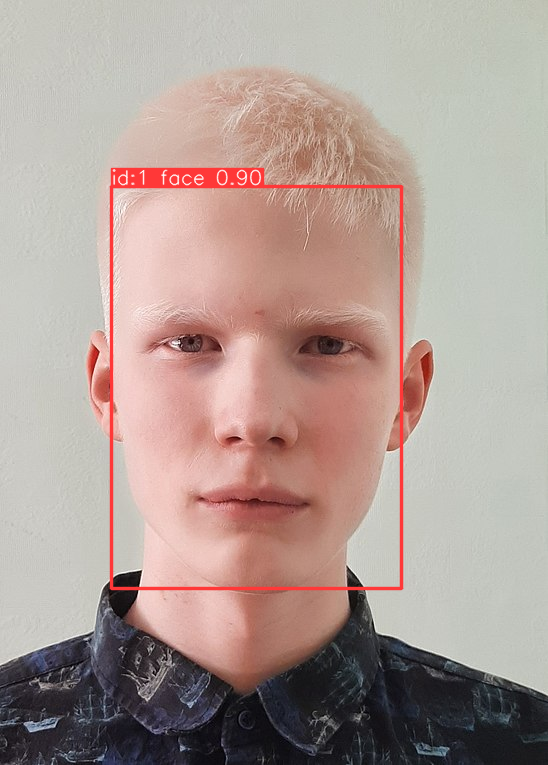

In [5]:
from PIL import Image

Image.fromarray(results[0].plot()[:, :, ::-1])

In [9]:
import os
root_dir = "/home/vorkov/Workspace/EDA/learning/data/UTKFace_resized_childfree_96"
trash_list = []
for filename in os.listdir(root_dir):
    file_path = os.path.join(root_dir, filename)
    results = modelYolo.track(file_path)
    if len(results[0]) != 1:
        trash_list.append(file_path)
        

FileNotFoundError: [Errno 2] No such file or directory: '/home/vorkov/Workspace/EDA/learning/data/UTKFace_resized_childfree_96'

In [60]:
len(trash_list)

7515

In [67]:
for filename in trash_list:
    os.remove(filename)